**Aim: Multiple Linear Regression in Python and R**

Theory:
Why do we need to study Multiple Linear Regression?

Multiple Linear Regression (MLR) is a statistical method that extends the concept of simple linear regression by allowing for the analysis of the relationship between a dependent variable and multiple independent variables. The need to study Multiple Linear Regression arises from its wide applicability and utility in various fields. Here are several reasons why it is essential:

Real-world Complexity: In many real-world scenarios, the relationship between a dependent variable and the influencing factors is rarely simplistic. Multiple Linear Regression provides a more realistic approach by considering multiple independent variables simultaneously, allowing us to model complex relationships.

Multifactorial Analysis: Multiple Linear Regression allows us to examine the combined effect of multiple factors on an outcome. This is crucial in fields such as economics, finance, and social sciences where multiple variables may influence an observed phenomenon.

Variable Interactions: MLR accounts for interactions between independent variables, providing insights into how the changes in one variable may affect the dependent variable while keeping other variables constant. This is especially important when assessing the impact of multiple factors on an outcome.

Improved Predictions: By incorporating multiple predictors, MLR often leads to more accurate predictions compared to simple linear regression. This is particularly beneficial in fields like marketing, where multiple factors contribute to consumer behavior.

Identifying Significance: MLR helps in determining the significance of each independent variable and whether it contributes meaningfully to the prediction of the dependent variable. This aids in feature selection and model simplification.

Control for Confounding Variables: In experimental design and observational studies, there may be confounding variables that influence both the dependent and independent variables. MLR enables the control of such confounding factors, enhancing the accuracy of the analysis.




In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Reading the Dataset
df = pd.read_csv("/content/data (1).csv")

In [3]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [4]:
df.shape

(36, 5)

In [5]:
print(df.corr())

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


In [6]:
print(df.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


In [7]:
#Setting the value for X and Y
X = df[['Weight', 'Volume']]
y = df['CO2']

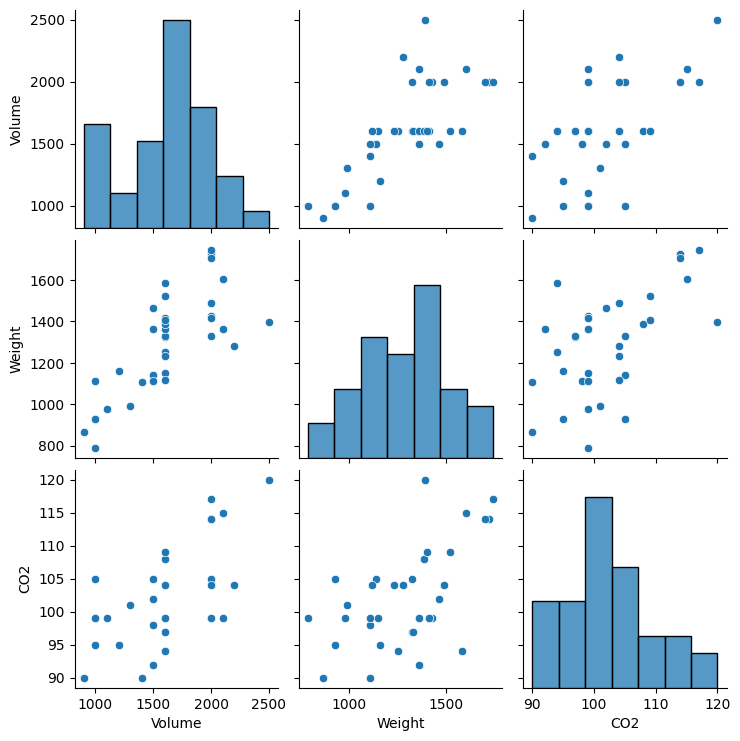

In [8]:
sns.pairplot(df)

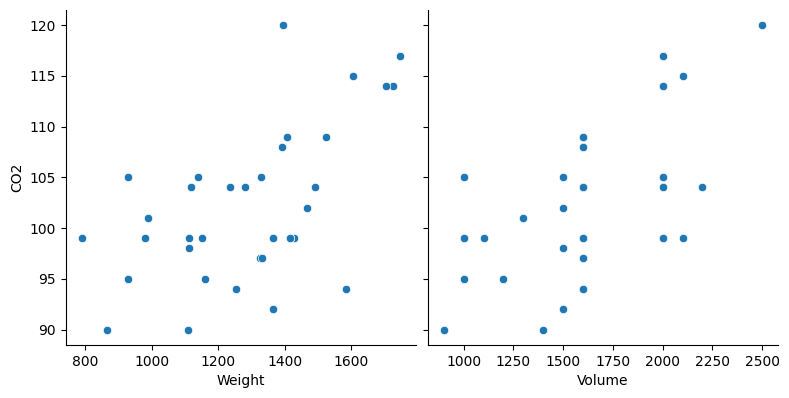

In [9]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

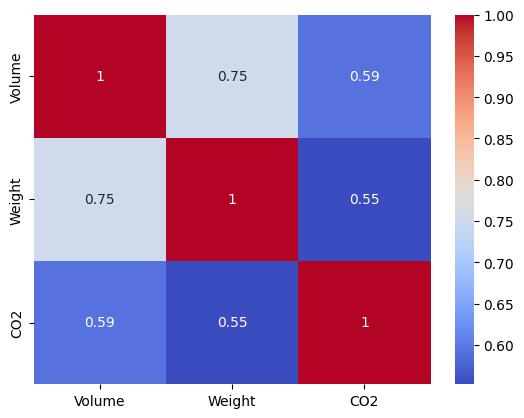

In [10]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
#Fitting the Multiple Linear Regression model
model = LinearRegression().fit(X_train, y_train)

In [14]:
coefficient_of_determination = model.score(X_test, y_test)
intercept = model.intercept_
coefficients = model.coef_

print("Coefficient of Determination (R^2):", coefficient_of_determination)
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Coefficient of Determination (R^2): -0.07468703086418338
Intercept: 74.33882836589245
Coefficients: [0.01718006 0.00250464]


In [15]:
predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
intercept = model.intercept_
coefficients = model.coef_


In [17]:
print(f"Coefficient of Determination (R^2): {r2}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Coefficient of Determination (R^2): -0.07468703086418338
Intercept: 74.33882836589245
Coefficients: [0.01718006 0.00250464]


In [18]:
# Predict the response
predictions = model.predict(X_test)

# Display the predictions
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(result)



    Actual   Predicted
0       99   90.415719
19     105  102.163234
32     104   99.563632
35     120  104.566618
7       92  101.546577
12      99   95.947700
29     114  108.640118
33     108  102.226542
5      105   92.803748
1       95   97.273271
18     104   97.570745


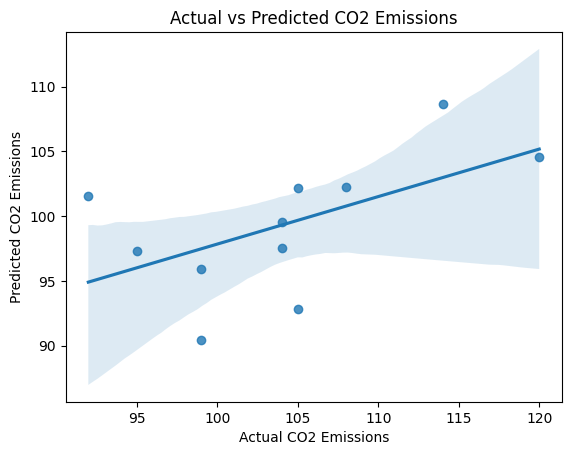

In [19]:
import matplotlib.pyplot as plt


sns.regplot(x=y_test,y=predictions)
# Scatter plot for actual vs predicted values
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.show()


R Implementation


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



     Car               Model               Volume         Weight    
 Length:36          Length:36          Min.   : 900   Min.   : 790  
 Class :character   Class :character   1st Qu.:1475   1st Qu.:1117  
 Mode  :character   Mode  :character   Median :1600   Median :1329  
                                       Mean   :1611   Mean   :1292  
                                       3rd Qu.:2000   3rd Qu.:1418  
                                       Max.   :2500   Max.   :1746  
      CO2        
 Min.   : 90.00  
 1st Qu.: 97.75  
 Median : 99.00  
 Mean   :102.03  
 3rd Qu.:105.00  
 Max.   :120.00  
Coefficient of Determination (R^2): 0.3765564 
Intercept: 79.69472 
Coefficients: 0.007550947 0.007805258 


`geom_smooth()` using formula = 'y ~ x'


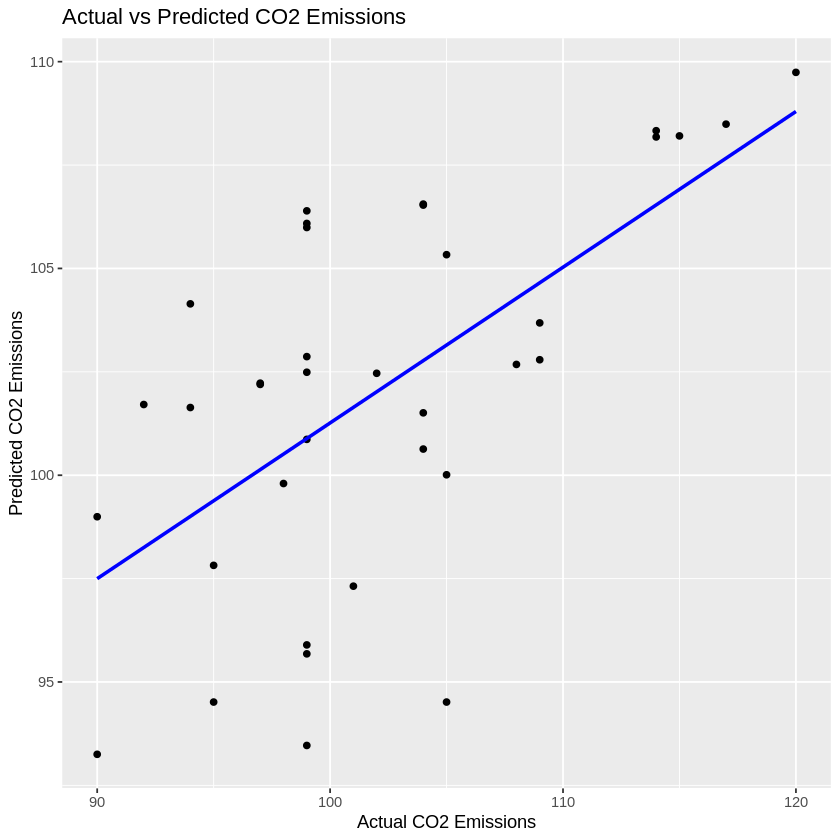

In [1]:
# Install and load necessary packages
install.packages("ggplot2")
library(ggplot2)

# Load the dataset
url <- "/content/data (1).csv"
df <- read.csv(url)

# Display summary of the dataset
print(summary(df))

# Create a linear regression model
model <- lm(CO2 ~ Weight + Volume, data = df)

# Get the values
r_squared <- summary(model)$r.squared
intercept <- coef(model)[1]
coefficients <- coef(model)[-1]

# Display the values
cat("Coefficient of Determination (R^2):", r_squared, "\n")
cat("Intercept:", intercept, "\n")
cat("Coefficients:", coefficients, "\n")

# Predict the response
predictions <- predict(model, newdata = df)

ggplot(df, aes(x = CO2, y = predictions)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Actual vs Predicted CO2 Emissions",
       x = "Actual CO2 Emissions",
       y = "Predicted CO2 Emissions")
